# Analisis Exploratorio de Datos

Mediante la exploración detallada de un extenso conjunto de datos proporcionado por el Observatorio de Movilidad y Seguridad Vial (OMSV), se busca identificar patrones, tendencias y factores clave que contribuyen a la ocurrencia de siniestros y a la gravedad de sus consecuencias. Este análisis preliminar no solo sienta las bases para el diseño del dashboard y la definición de KPIs, sino que también ofrece perspectivas críticas que respaldarán la formulación de políticas efectivas y medidas preventivas para reducir el número de víctimas fatales en siniestros viales en la ciudad.

## 0. Importamos librerias

In [80]:
import pandas as pd
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

## 1. Obtencion de datos

In [81]:
df_siniestros = pd.read_csv("Datasets/df_siniestros.csv")

## 2. Exploracion Inicial

### 2A. Examinamos las primeras filas del dataframe para entender la estructura

In [82]:
df_siniestros.head()

,Id,Nro Victimas,Fecha,Año,Mes,Dia,Hora,Franja Horaria,Lugar,Tipo Calle,...,Longitud,Latitud,Participantes,Victima,Acusado,DiaSemana,MomentoDia,Rol,Sexo,Edad
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,Viernes,Madrugada,CONDUCTOR,MASCULINO,19.0
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,AUTOPISTA,...,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,Sábado,Madrugada,CONDUCTOR,MASCULINO,70.0
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,Domingo,Mañana,CONDUCTOR,MASCULINO,30.0
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,-58.465039,-34.680930,MOTO-SD,MOTO,SD,Domingo,Madrugada,CONDUCTOR,MASCULINO,18.0
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,Jueves,Madrugada,CONDUCTOR,MASCULINO,29.0


In [83]:
df_siniestros.shape

(707, 24)

In [84]:
df_siniestros.columns

Index(['Id', 'Nro Victimas', 'Fecha', 'Año', 'Mes', 'Dia', 'Hora',
       'Franja Horaria', 'Lugar', 'Tipo Calle', 'Calle', 'Cruce',
       'Dirección Normalizada', 'Comuna', 'Longitud', 'Latitud',
       'Participantes', 'Victima', 'Acusado', 'DiaSemana', 'MomentoDia', 'Rol',
       'Sexo', 'Edad'],
      dtype='object')

### 2B. Verificar los tipos de datos de las variables

In [85]:
df_siniestros.dtypes

Id                        object
Nro Victimas               int64
Fecha                     object
Año                        int64
Mes                        int64
Dia                        int64
Hora                      object
Franja Horaria             int64
Lugar                     object
Tipo Calle                object
Calle                     object
Cruce                     object
Dirección Normalizada     object
Comuna                     int64
Longitud                 float64
Latitud                  float64
Participantes             object
Victima                   object
Acusado                   object
DiaSemana                 object
MomentoDia                object
Rol                       object
Sexo                      object
Edad                     float64
dtype: object

## 3. Identificamos valores nulos y faltantes

In [86]:
columnas_sd_dicc = {}  

for columna in df_siniestros.columns:
    cantidad = (df_siniestros[columna] == 'SD').sum()
    columnas_sd_dicc[columna] = cantidad

for columna, conteo in columnas_sd_dicc.items():
    print(f"Columna '{columna}': {conteo} veces que aparece 'SD'")

Columna 'Id': 0 veces que aparece 'SD'
Columna 'Nro Victimas': 0 veces que aparece 'SD'
Columna 'Fecha': 0 veces que aparece 'SD'
Columna 'Año': 0 veces que aparece 'SD'
Columna 'Mes': 0 veces que aparece 'SD'
Columna 'Dia': 0 veces que aparece 'SD'
Columna 'Hora': 0 veces que aparece 'SD'
Columna 'Franja Horaria': 0 veces que aparece 'SD'
Columna 'Lugar': 0 veces que aparece 'SD'
Columna 'Tipo Calle': 0 veces que aparece 'SD'
Columna 'Calle': 0 veces que aparece 'SD'
Columna 'Cruce': 0 veces que aparece 'SD'
Columna 'Dirección Normalizada': 0 veces que aparece 'SD'
Columna 'Comuna': 0 veces que aparece 'SD'
Columna 'Longitud': 0 veces que aparece 'SD'
Columna 'Latitud': 0 veces que aparece 'SD'
Columna 'Participantes': 0 veces que aparece 'SD'
Columna 'Victima': 8 veces que aparece 'SD'
Columna 'Acusado': 20 veces que aparece 'SD'
Columna 'DiaSemana': 0 veces que aparece 'SD'
Columna 'MomentoDia': 0 veces que aparece 'SD'
Columna 'Rol': 0 veces que aparece 'SD'
Columna 'Sexo': 2 veces

In [87]:
df_siniestros.isnull().sum()

Id                       0
Nro Victimas             0
Fecha                    0
Año                      0
Mes                      0
Dia                      0
Hora                     0
Franja Horaria           0
Lugar                    0
Tipo Calle               0
Calle                    0
Cruce                    0
Dirección Normalizada    0
Comuna                   0
Longitud                 0
Latitud                  0
Participantes            0
Victima                  0
Acusado                  0
DiaSemana                0
MomentoDia               0
Rol                      0
Sexo                     0
Edad                     2
dtype: int64

## 5. Estadisticas descriptivas basicas

### Variables cuantitativas

In [88]:
df_siniestros.describe()

,Nro Victimas,Año,Mes,Dia,Franja Horaria,Comuna,Longitud,Latitud,Edad
count,707.000000,707.00000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,705.000000
mean,1.059406,2018.18529,6.695898,15.916549,11.567185,7.431400,-58.441645,-34.619662,42.068085
std,0.253879,1.66990,3.579454,8.655516,6.678319,4.374699,0.046398,0.035352,19.269350
min,1.000000,2016.00000,1.000000,1.000000,0.000000,1.000000,-58.529942,-34.705250,1.000000
25%,1.000000,2017.00000,4.000000,9.000000,6.000000,4.000000,-58.476776,-34.643980,28.000000
50%,1.000000,2018.00000,7.000000,16.000000,11.000000,8.000000,-58.444513,-34.622882,36.000000
75%,1.000000,2019.00000,10.000000,23.000000,17.000000,11.000000,-58.401841,-34.596991,55.000000
max,3.000000,2021.00000,12.000000,31.000000,23.000000,15.000000,-58.356082,-34.534654,95.000000


## Conclusiones Preliminares:
* Datos Generales:<br>
El conjunto de datos cuenta con 707 registros y 25 columnas.<br>
Las columnas relevantes incluyen información sobre el accidente, las víctimas, la ubicación, y detalles temporales como la fecha y hora.<br>
* Nulos y Valores Específicos:<br>
Se observa que hay celdas con el valor 'SD' en las columnas 'Id', 'Victima', 'Acusado', 'Sexo' y 'Fecha_fallecimiento'.<br>
Algunas columnas, como 'Edad' y 'Fecha_fallecimiento', contienen valores nulos que pueden necesitar tratamiento.<br>
* Características Temporales:<br>
Los accidentes parecen estar distribuidos de manera uniforme a lo largo de los años, meses y días, con un promedio de 1.06 víctimas por accidente.<br>
* Ubicación y Franja Horaria:<br>
La mayoría de los accidentes ocurren en la franja horaria entre las 6:00 y las 23:00 horas. <br>
La comuna más afectada es la número 7.<br>
* Edad:<br>
La edad promedio de las víctimas es de aproximadamente 42 años.

## Visualizacion de datos

Observaremos la distribucion de los datos a partir de distintos graficos

### Edad

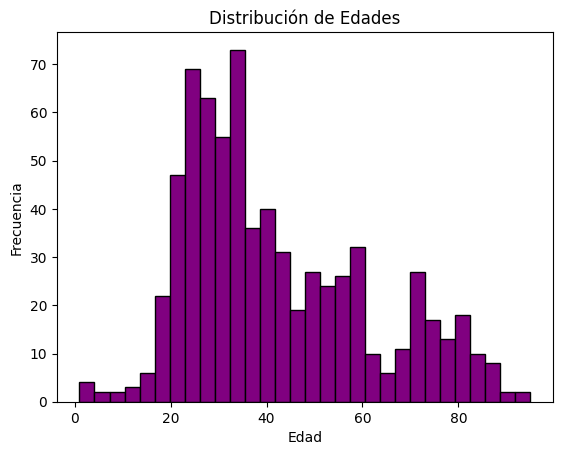

In [89]:
plt.hist(df_siniestros["Edad"].dropna(), bins=30, edgecolor='black', color="purple")
plt.title("Distribución de Edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

El histograma muestra que la mayoría de las victimas tiene entre 20 y 40 años de edad. La frecuencia disminuye a medida que la edad aumenta, lo que indica que hay menos personas mayores de 40 años.

### Numero de victimas

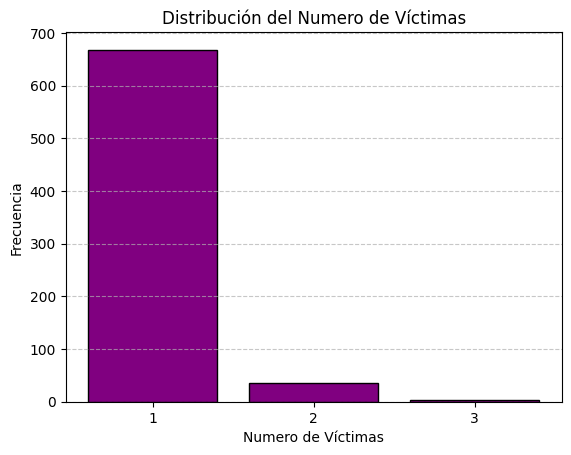

In [90]:
victimas_counts = df_siniestros["Nro Victimas"].value_counts().sort_index()

plt.bar(victimas_counts.index, victimas_counts.values, color="purple", edgecolor= "black")
plt.title("Distribución del Numero de Víctimas")
plt.xlabel("Numero de Víctimas")
plt.ylabel("Frecuencia")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(range(int(df_siniestros["Nro Victimas"].min()), int(df_siniestros["Nro Victimas"].max()) + 1))
plt.show()

El grafico sugiere que los siniestros viales con un número pequeño de víctimas son mucho más comunes que los siniestros viales con un número grande de víctimas.

### Mes


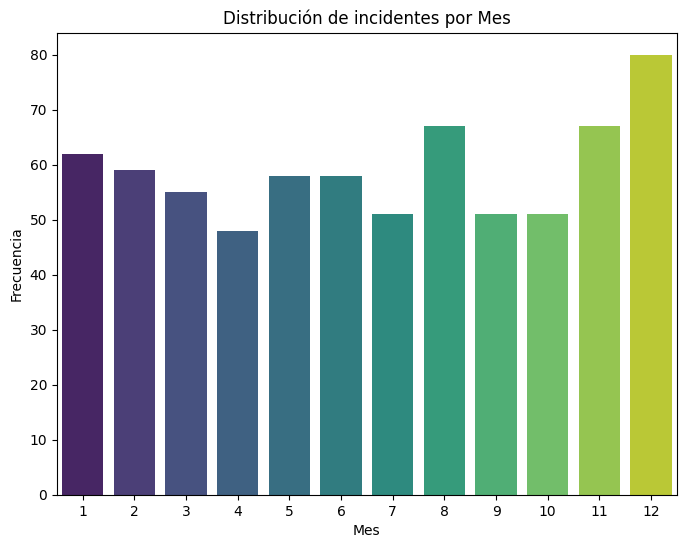

In [91]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Mes", data=df_siniestros, palette="viridis")
plt.title("Distribución de incidentes por Mes")
plt.xlabel("Mes")
plt.ylabel("Frecuencia")
plt.show()

El mes con más incidentes fue diciembre.
El mes con menos incidentes fue abril.
El número de incidentes disminuyo gradualmente desde enero hasta abril.
El número de incidentes aumento gradualmente en los meses de mayo, junio, agosto y noviembre.

### Tipo de calle

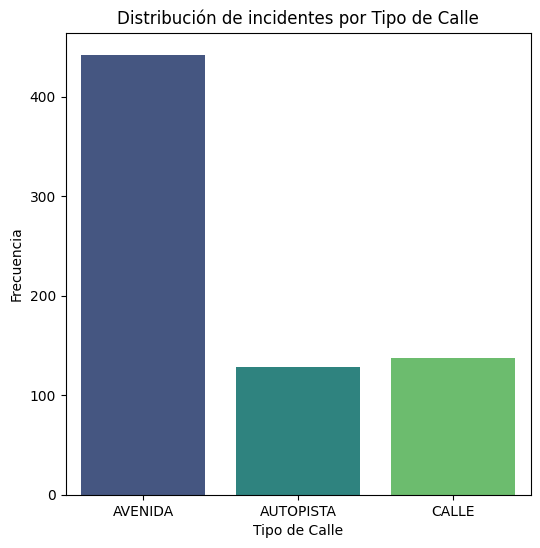

In [92]:
plt.figure(figsize=(6, 6))
sns.countplot(x="Tipo Calle", data=df_siniestros, palette="viridis")
plt.title("Distribución de incidentes por Tipo de Calle")
plt.xlabel("Tipo de Calle")
plt.ylabel("Frecuencia")
plt.show()

El gráfico muestra que la frecuencia de incidentes viales es mayor en las avenidas que en las calles y autopistas. Esto puede deberse a varios factores, como el mayor tráfico en las avenidas, la mayor velocidad de los vehículos en las avenidas, y la mayor presencia de peatones y ciclistas en ellas.

### Comuna

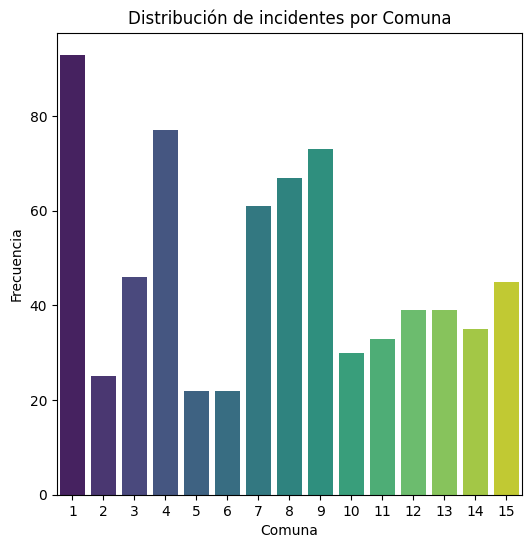

In [93]:
plt.figure(figsize=(6, 6))
sns.countplot(x="Comuna", data=df_siniestros, palette="viridis")
plt.title("Distribución de incidentes por Comuna")
plt.xlabel("Comuna")
plt.ylabel("Frecuencia")
plt.show()

En el grafico podemos observar que la comuna que tiene la mayor cantidad de incidentes viales es la comuna 1 que representa los barrios de:Retiro, San Nicolás, Puerto Madero, San Telmo, Montserrat y Constitución. <br>
La segunda comuna con mas incidentes viales es la comuna 4 que representa los barrios de: La Boca, Barracas, Parque Patricios y Nueva Pompeya. <br>
Mientras que las dos comunas que representan el numero mas bajo de incidentes son comuna 5 que representa los barrios de Almagro y Boedo, y la comuna 6 que representa el barrio de Caballito. <br>
Esto puede deberse a varios factores, como la mayor cantidad de vehículos que circulan en estas comunas, la mayor densidad de población, y la mayor presencia de peatones y ciclistas.

### Dia de la semana

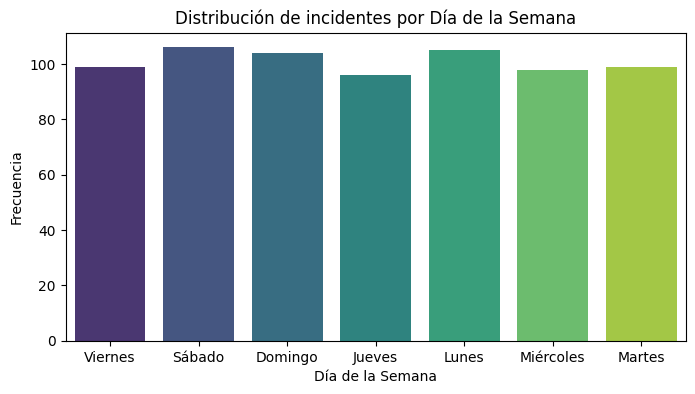

In [94]:
plt.figure(figsize=(8, 4))
sns.countplot(x="DiaSemana", data=df_siniestros, palette="viridis")
plt.title("Distribución de incidentes por Día de la Semana")
plt.xlabel("Día de la Semana")
plt.ylabel("Frecuencia")
plt.show()

El gráfico muestra que el número de víctimas de incidentes viales es mayor los fines de semana que los días laborables. Esto puede deberse a varios factores, como el mayor consumo de alcohol y drogas, la mayor presencia de peatones y ciclistas, y la mayor cantidad de vehículos en las calles.

### Momento del dia 

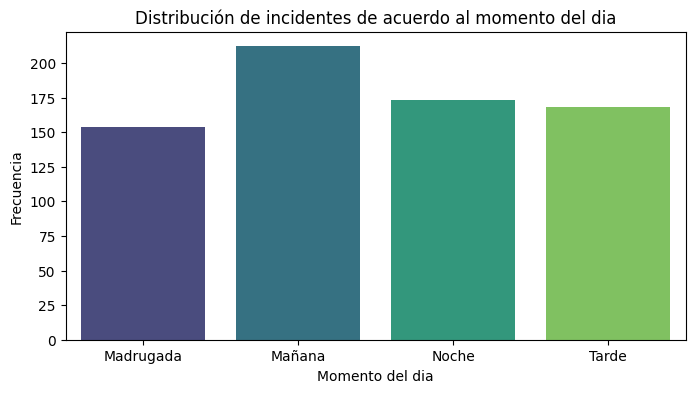

In [95]:
plt.figure(figsize=(8, 4))
sns.countplot(x="MomentoDia", data=df_siniestros, palette="viridis")
plt.title("Distribución de incidentes de acuerdo al momento del dia")
plt.xlabel("Momento del dia")
plt.ylabel("Frecuencia")
plt.show()

El gráfico muestra que el número de incidentes viales es mayor en las horas de la mañana (de 6am a 12pm) y la noche (de 6pm a 12am) que en las horas de la tarde (de 12pm a 6pm). Esto puede deberse a varios factores, como el mayor tráfico en las horas de la mañana y la noche como tambien la mayor presencia de ciclistas y peatones dado que son horas de salidas y entradas de trabajo,escuelas,etc.

### Rol

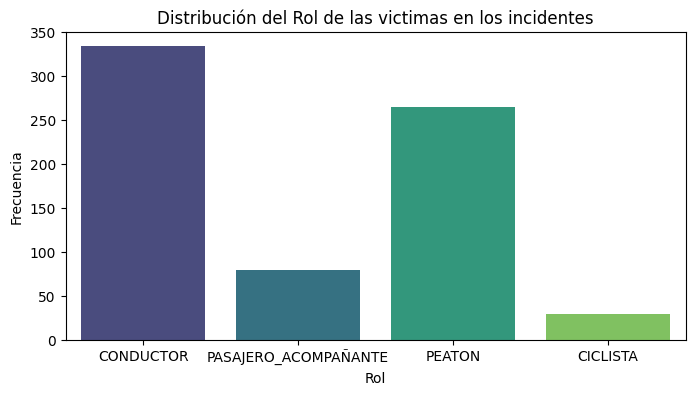

In [97]:
plt.figure(figsize=(8, 4))
sns.countplot(x="Rol", data=df_siniestros, palette="viridis")
plt.title("Distribución del Rol de las victimas en los incidentes")
plt.xlabel("Rol")
plt.ylabel("Frecuencia")
plt.show()

El gráfico muestra que los conductores son las víctimas más comunes en los incidentes viales, seguidos de los peatones y los pasajeros. Esto puede deberse a que los conductores son los usuarios de la vía que están más expuestos a los riesgos de accidentes.

### Sexo

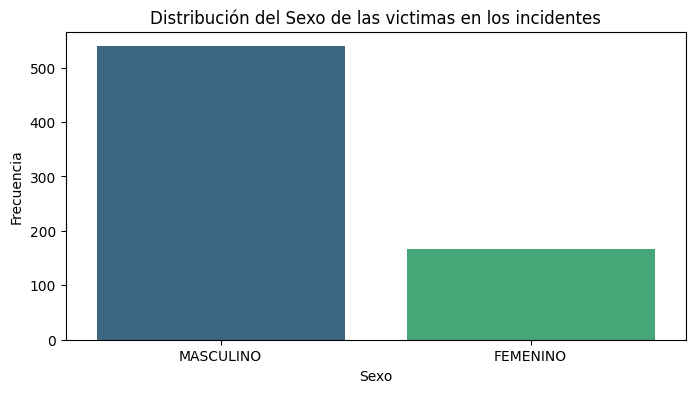

In [99]:
df_sexo_filtrado = df_siniestros[df_siniestros["Sexo"] != "SD"]

plt.figure(figsize=(8, 4))
sns.countplot(x="Sexo", data=df_sexo_filtrado, palette="viridis")
plt.title("Distribución del Sexo de las victimas en los incidentes")
plt.xlabel("Sexo")
plt.ylabel("Frecuencia")
plt.show()

Como habiamos visualizado previamente el genero mas frecuente en victimas de siniestros viales es el genero masculino